# Investigate the Data

Welcome to the cumulative project on clustering algorithms! In this project, we will be investigating the way people think about masculinity by applying the KMeans algorithm to data from  <a href="https://fivethirtyeight.com/" target = "_blank">FiveThirtyEight</a>. FiveThirtyEight is a popular website known for their use of statistical analysis in many of their stories.

To begin, take a look at `masculinity-survey.pdf`. FiveThirtyEight and WNYC studios used this survey to get their male readers' thoughts on masculinity. After looking through some of the questions asked, take a look at FiveThirtyEight's article <a href="https://fivethirtyeight.com/features/what-do-men-think-it-means-to-be-a-man/" target = "_blank">What Do Men Think It Means To Be A Man?</a> to see their major takeaways. We're going to try to find more insights using machine learning.

Load `masculinity.csv` into a DataFrame named `survey`. This file contains the raw responses to the masculinity survey. Let's start getting a sense of how this data is structured. Try to answer these questions using your Pandas knowledge:
* What are the names of the columns? How do those columns relate to the questions in the PDF?
* How many rows are there?
* How is a question with multiple parts, like question 7, represented in the DataFrame?
* How many people said they often ask a friend for professional advice? This is the first sub-question in question 7.



In [24]:
import pandas as pd

survey = pd.read_csv("masculinity.csv")
survey.head()  # check the data 

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


In [4]:
survey.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [5]:
survey.shape

(1189, 98)

In [8]:
# check how data presented in Question 7
survey.iloc[:,12:23]

,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011
0,Often,Often,Often,Often,"Never, and not open to it","Never, and not open to it",Often,Sometimes,Sometimes,"Never, and not open to it",Often
1,Rarely,Sometimes,"Never, but open to it",Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Sometimes,No answer
2,Sometimes,Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Rarely,Sometimes,Rarely,"Never, and not open to it"
3,Rarely,Rarely,Sometimes,Rarely,Rarely,Often,"Never, and not open to it","Never, and not open to it",Rarely,"Never, and not open to it","Never, and not open to it"
4,Sometimes,Rarely,"Never, and not open to it","Never, but open to it","Never, but open to it",Sometimes,"Never, and not open to it",Often,Rarely,"Never, but open to it",Sometimes
5,"Never, but open to it",Sometimes,Sometimes,Rarely,"Never, but open to it",Often,"Never, and not open to it",Sometimes,Often,"Never, but open to it","Never, and not open to it"
6,Sometimes,Sometimes,"Never, and not open to it",Rarely,Rarely,Rarely,"Never, and not open to it",Sometimes,Sometimes,"Never, and not open to it",Rarely
7,Rarely,Rarely,"Never, and not open to it","Never, but open to it","Never, and not open to it",Often,"Never, and not open to it",Sometimes,Sometimes,"Never, but open to it",Rarely
8,Sometimes,Sometimes,Sometimes,Sometimes,"Never, but open to it",Often,"Never, and not open to it",Often,Sometimes,"Never, and not open to it",Rarely
9,Sometimes,Rarely,"Never, and not open to it",Rarely,"Never, and not open to it",Often,"Never, and not open to it",Often,Rarely,"Never, but open to it",Sometimes


In [9]:
survey['q0007_0001'].value_counts()

Sometimes                    537
Rarely                       324
Often                        142
Never, but open to it        123
Never, and not open to it     53
No answer                     10
Name: q0007_0001, dtype: int64

# Mapping the Data

In order for us to start thinking about using the KMeans algorithm with this data, we need to first figure out how to turn these responses into numerical data. Let's once again consider question 7. We can't cluster the data using the phrases `"Often"` or `"Rarely"`, but we can turn those phrases into numbers. For example, we could map the data in the following way: 
* `"Often"` -> `4`
* `"Sometimes"` ->  `3`
* `"Rarely"` -> `2` 
* `"Never, but open to it"` -> `1`
* `"Never, and not open to it"` -> `0`.



In [25]:
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]

for col in cols_to_map:
    survey[col] =  survey[col].map({"Never, and not open to it": 0, 
                                    "Never, but open to it": 1, 
                                    "Rarely": 2, "Sometimes": 3, "Often": 4})
print(survey["q0007_0001"].value_counts())

  
    

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


# Plotting the Data

We now have 11 different features that we could use in our KMeans algorithm. Before we jump into clustering, let's graph some of these features on a 2D graph. Call `plt.scatter` using `survey["q0007_0001"]` and `survey["q0007_0002"]` as parameters. Include `alpha = 0.1`. We want to include `alpha` because many of the data points will be on top of each other. Adding `alpha` will make the points appear more solid if there are many stacked on top of each other.

Include axis labels on your graph. The x-axis corresponds with the first column you gave the `scatter()` function. So in this case, it corresponds to the question about asking a friend for professional advice.

Does it make sense that there are few points in the top left and bottom right corners of the graph? Why? Try graphing other dimensions against each other. Are there any combinations that give you surprising results?


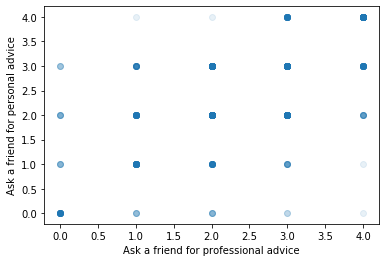

In [29]:
from matplotlib import pyplot as plt
plt.scatter(survey["q0007_0001"],survey["q0007_0002"],alpha = 0.1)
plt.xlabel("Ask a friend for professional advice")
plt.ylabel("Ask a friend for personal advice")
plt.show()

On the top left and bottom right, there isn't a whole lot of people that answered. That't make sense, for example, when you oftern ask a friend for professional advice, generally, you will be comfortable ask a friend for personal advice.

# Build the KMeans Model

It's now time to start clustering! There are so many interesting questions we could ask about this data. Let's start by seeing if clusters form based on traditionally masculine concepts. 

Take a look at the first four sub-questions in question 7. Those four activities aren't necessarily seen as traditionally masculine. On the other hand, sub-questions 5, 8, and 9 are often seen as very masculine activities. What would happen if we found 2 clusters based on those 7 questions? Would we find clusters that represent traditionally feminine and traditionally masculine people? Let's find out.

We need to first drop all of the rows that contain a `NaN` value in any of the columns we're interested in. Create a new variable named `rows_to_cluster` and set it equal to the result of calling `dropna` on `survey`. `dropna` should have a parameter `subset` equal to a list of the 7 columns we want. If you don't include `subset`, the function will drop all rows that have an `NaN` in *any* column. This would drop almost all the rows in the dataframe!

Create a `KMeans` object named `classifier` where `n_clusters = 2`. Call `classifier`'s `.fit()` method. The parameter of `.fit()` should be the 7 columns we're interested in. 


In [30]:
from sklearn.cluster import KMeans
col=["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004", "q0007_0005", "q0007_0008", "q0007_0009"]
rows_to_cluster=survey.dropna(subset=col)
classifier = KMeans(n_clusters = 2)
classifier.fit(rows_to_cluster[col])
print(classifier.cluster_centers_)   # print out the cluster center.


[[2.84425036 2.81513828 2.84133916 2.39883552 0.69577875 3.0713246
  2.89665211]
 [1.87798408 1.84350133 0.84615385 1.72413793 0.56763926 2.63660477
  1.97612732]]


# Separate the Cluster Members

When we look at the two clusters, the first four numbers represent the traditionally feminine activities and the last three represent the traditionally masculine activities. If the data points separated into a feminine cluser and a masculine cluseter, we would expect to see one cluster to have high values for the first four numbers and the other cluster to have high values for the last three numbers.

Instead, the first cluster has a higher value in every feature. Since a higher number means the person was more likely to "often" do something, the clusters seem to represent "people who do things" and "people who don't do things".

We might be able to find out more information about these clusters by looking at the specific members of each cluster. Print `classifier.labels_`. This list shows which cluster every row in the DataFrame corresponds to.


In [31]:
print(classifier.labels_)

[0 1 0 ... 1 1 1]


In [35]:
# get the index of each cluster in the dataset
cluster_zero_indices=[]
cluster_one_indices=[]
for i in range(len(classifier.labels_)):
    if classifier.labels_[i]==0:
        cluster_zero_indices.append(i)
    else:
        cluster_one_indices.append(i)

# Investigate the Cluster Members

Now that we have the indices for each cluster, let's look at some stats about these two clusters. 

let's look at some information about these two clusters. Print the `value_counts()` of the `educ4` column of each cluster. What do you notice? Try looking at different columns. For example, are the people in cluster zero significantly older than those in cluster one? You can look at the `age3` column to see.

If you divide the result of `value_counts()` by the size of the cluster, you get the percentage of people in each category rather than the total number. This will make it easier to compare the two clusters.

In [34]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df= rows_to_cluster.iloc[cluster_one_indices]
print(cluster_zero_df['educ4'].value_counts() / len(cluster_zero_df))
print(cluster_one_df['educ4'].value_counts() / len(cluster_one_df))

Post graduate degree    0.365357
College or more         0.330422
Some college            0.231441
High school or less     0.072780
Name: educ4, dtype: float64
Some college            0.312997
College or more         0.286472
Post graduate degree    0.251989
High school or less     0.145889
Name: educ4, dtype: float64


In [36]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df= rows_to_cluster.iloc[cluster_one_indices]
print(cluster_zero_df['age3'].value_counts() / len(cluster_zero_df))
print(cluster_one_df['age3'].value_counts() / len(cluster_one_df))

35 - 64      0.478894
65 and up    0.454148
18 - 34      0.066958
Name: age3, dtype: float64
65 and up    0.503979
35 - 64      0.432361
18 - 34      0.061008
Name: age3, dtype: float64


It looks like people don't fall into a "masculine" category or a "feminine" category. Instead, they seem to be divided by their level of education!
